<h1>Naive Bayes</h1>
<p>The first thing we are going to do to build the NB classifier is import some packages</p>




In [1]:
import pandas as pd
import numpy as np

Next, we'll read in some data.  I used the Titanic dataset that is very popular on Kaggle for basic classification with the 'Survived' feature as the class we will be predicting.

In [4]:
df=pd.read_csv('sample_data/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The next thing we need to do is change some of the categorical variables to a binary so that we can use them in the classifier and drop the columns we aren't going to use.

In [6]:
df1 = pd.get_dummies(df
               ,columns = ['Sex', 'Embarked']
               ,drop_first = False
               ).dropna()

df1 = df1.drop(columns=['PassengerId', 'Name','Ticket', 'Cabin', 'Sex_male'])
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,1,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,1
6,0,1,54.0,0,0,51.8625,0,0,0,1
10,1,3,4.0,1,1,16.7000,1,0,0,1
11,1,1,58.0,0,0,26.5500,1,0,0,1


Now lets split the data into our dependent and independent features

In [10]:
y = np.array(df1.Survived)
X= np.array(df1.drop(columns=['Survived']))

Now we need to split the data into test and train sets so that we can fit on one part and use the rest to evaluate it on unseen data.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

Now we can fit the model

In [12]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

GaussianNB()

Now we can use the model fitted on the training data to run predictions on the test set and do some model evaluation

In [25]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7580645161290323
Precision: 0.8536585365853658
Recall: 0.7954545454545454
F1 Score: 0.7631002773317763


The overall accuracy score tells us that roughly 75% of the time the model is correctly detecting whether or not a Titanic passenger survived using just the features we extracted.  The F1 score shows us how the model is balanced between recall (how good it is at detecting survivial) and precision (how many false positives it pulled in along the way). Next we'll look at the confusion matrix to see that in more detail.

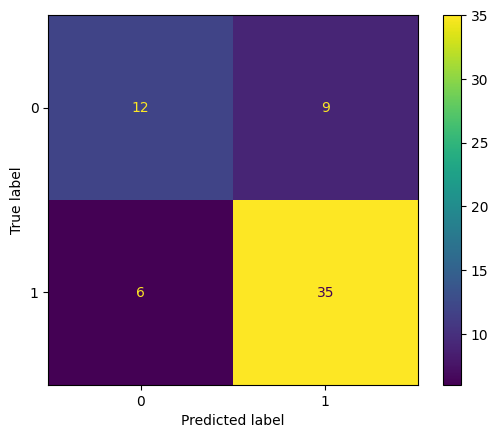

In [15]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Using the confusion matrix we can see that out of 41 passengers that actually survived, the model correctly identified 35 of them (85%) as survivors, and out of the 44 passengers the model predicted would survive 35 of them (79%) actually did. In total it shows us that 15 out of 62 passengers were classified incorrectly.